This script tries to classify Cancer desease state in binary way. The used dataset is the one below:

https://www.kaggle.com/datasets/erdemtaha/cancer-data

An accuracy of 98.8% is reached using Convolution and Fully Conected layers

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras import backend as K
from tensorflow.keras.layers import Layer
import matplotlib.pyplot as plt

In [2]:
import csv
cancer_feature = []
labels = []
with open('/kaggle/input/cancer-data/Cancer_Data.csv', 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
    cancer_feature.append(row[2:])
    labels.append(row[1])
labels = [1.0 if item=='M' else 0.0 for item in labels ]

In [3]:
#convert list to array
cancer_feature = np.array(cancer_feature).astype(np.float64)
labels = np.array(labels)

max_values = []
for index in range(30):
  max_values.append(cancer_feature[:, index].max())

#Normalize features
max_values = [1.0 if item <= 1.0 else item for item in max_values]
cancer_feature = np.array([cancer_feature[index]/max_values for index in range(labels.shape[0])])


In [4]:
#split into training and validation sets, 70%, 30%
total_length = labels.shape[0]
split_ratio = 0.7
x_train, y_train = cancer_feature[0:int(split_ratio*total_length)], labels[0:int(split_ratio*total_length)]
x_test, y_test = cancer_feature[int(split_ratio*total_length):], labels[int(split_ratio*total_length):]

In [5]:
#Prepare input shape for Conv1D input layer
x_train = x_train.reshape(-1, 30, 1)
x_test = x_test.reshape(-1, 30, 1)
#check
print(x_train.shape)
print(x_test.shape)
print(x_train.shape[0] + x_test.shape[0])

(398, 30, 1)
(171, 30, 1)
569


In [6]:
#define callback for early stop
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') is not None and logs.get('accuracy') >= 0.982 and logs.get('val_accuracy') >= 0.982:                 
      print("\nReached wanted accuracy so cancelling training!")
      
      self.model.stop_training = True

callbacks = MyCallback()

In [7]:
#Model definition

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(64, 3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

In [8]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=7e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
#let's train
epochs_len = 500
history = model2.fit(
    x_train, y_train,
    epochs=epochs_len,
    batch_size=10,
    verbose=1,
    validation_data=(x_test, y_test), 
    callbacks=[callbacks]
    )

Epoch 1/500
40/40 [==============================] - 2s 14ms/step - loss: 0.6757 - accuracy: 0.6935 - val_loss: 0.6889 - val_accuracy: 0.3333
Epoch 2/500
40/40 [==============================] - 0s 7ms/step - loss: 0.6479 - accuracy: 0.6633 - val_loss: 0.6765 - val_accuracy: 0.4211
Epoch 3/500
40/40 [==============================] - 0s 6ms/step - loss: 0.6162 - accuracy: 0.7035 - val_loss: 0.6315 - val_accuracy: 0.7135
Epoch 4/500
40/40 [==============================] - 0s 6ms/step - loss: 0.5769 - accuracy: 0.8568 - val_loss: 0.5913 - val_accuracy: 0.7895
Epoch 5/500
40/40 [==============================] - 0s 5ms/step - loss: 0.5299 - accuracy: 0.8744 - val_loss: 0.5304 - val_accuracy: 0.8655
Epoch 6/500
40/40 [==============================] - 0s 5ms/step - loss: 0.4782 - accuracy: 0.9020 - val_loss: 0.4766 - val_accuracy: 0.8772
Epoch 7/500
40/40 [==============================] - 0s 6ms/step - loss: 0.4283 - accuracy: 0.9070 - val_loss: 0.4010 - val_accuracy: 0.9181
Epoch 8/500


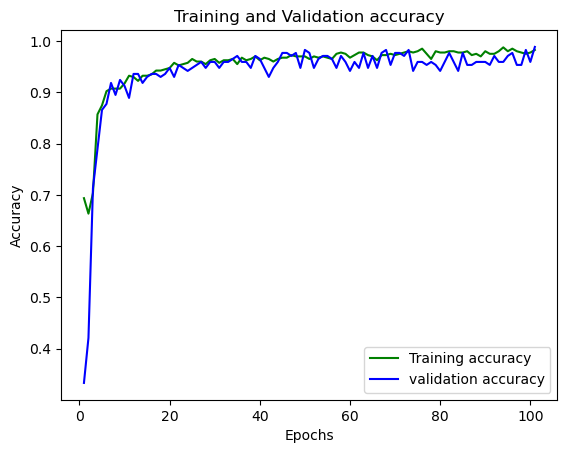

In [10]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

epochs = range(1,history.epoch[-1]+2)
plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

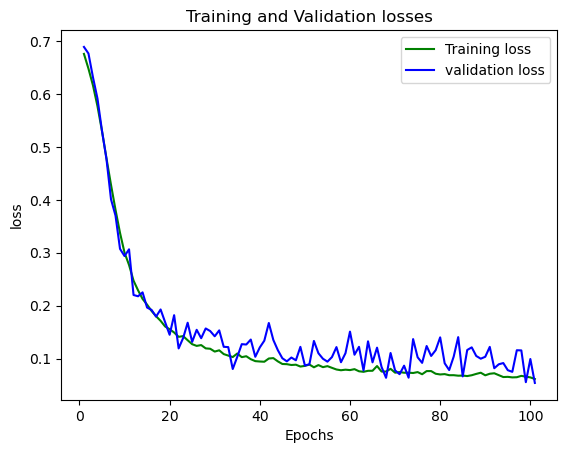

In [11]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and Validation losses')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
